<a href="https://colab.research.google.com/github/Soban-2004/PRODIGY_ML_03/blob/main/PRODIGY_ML_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
dir='/content/drive/MyDrive/PetImages'
categories=['Cat','Dog']
data=[]
for category in categories:
    path=os.path.join(dir,category)
    label=categories.index(category)

    for img in os.listdir(path):
        imgpath=os.path.join(path,img)
        pet_img=cv2.imread(imgpath,0)
        try:
            pet_img=cv2.resize(pet_img,(50,50))
            image=np.array(pet_img).flatten()

            data.append([image,label])
        except Exception as e:
            pass

In [3]:
len(data)

13047

In [4]:
random.shuffle(data)
features=[]
labels=[]
for feature,label in data:
    features.append(feature)
    labels.append(label)

In [5]:
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.25)

In [6]:
model=SVC(C=1,kernel='poly',gamma='auto')
model.fit(x_train,y_train)
pick=open('model1.sav','wb')
pickle.dump(model,pick)
pick.close()

In [7]:
pick=open('model1.sav','rb')
model=pickle.load(pick)
pick.close()

In [8]:
prediction=model.predict(x_test)
accuracy=model.score(x_test,y_test)
categories=['CATS','DOGS']
print('Accuracy: ',accuracy*100)
print('Prediction of randomly selected image from dataset: ',categories[prediction[0]])
mypet=x_test[0].reshape(50,50)

Accuracy:  92.88779889638259
Prediction of randomly selected image from dataset:  CATS


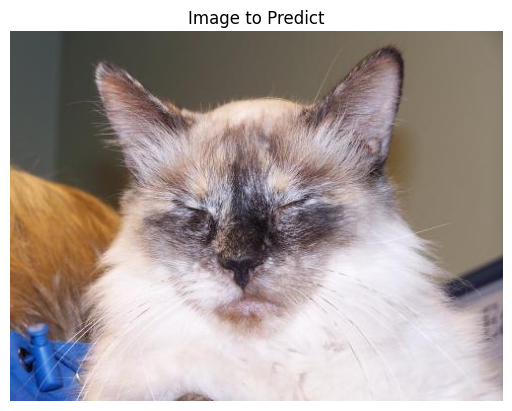

Predicted Class: Cat


In [10]:
import cv2

image_path = '/content/drive/MyDrive/PetImages/Cat/29.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
plt.imshow(image_rgb)
plt.title('Image to Predict')
plt.axis('off')
plt.show()

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (50, 50))
    grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    flattened_image = grayscale_image.flatten().reshape(1, -1)
    return flattened_image

def predict_image(image_path):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    return prediction[0]

predicted_class = predict_image(image_path)

print('Predicted Class:', 'Dog' if predicted_class == 1 else 'Cat')

